In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the *data*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

feature_columns = pd.read_csv("/content/drive/MyDrive/Datasets/original_housing_train_1726115957.csv", index_col = 0)
target_columns = pd.read_csv("/content/drive/MyDrive/Datasets/original_housing_train_tgt_1726116437.csv",index_col = 0)
df = feature_columns.merge(target_columns, left_index=True, right_index=True)


print(df.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3032     -119.12     35.41                12.0       5589.0           941.0   
20195    -119.20     34.27                 8.0       4942.0          1173.0   
16166    -122.50     37.78                46.0       2646.0           607.0   
10695    -117.74     33.61                16.0       2753.0           576.0   
7440     -118.20     33.94                44.0       1413.0           298.0   

       population  households  median_income ocean_proximity  \
3032       3018.0       917.0         4.4561          INLAND   
20195      3012.0      1033.0         3.4450      NEAR OCEAN   
16166      1418.0       563.0         3.7167        NEAR BAY   
10695       857.0       546.0         3.7422       <1H OCEAN   
7440       1200.0       307.0         3.5125       <1H OCEAN   

       median_house_value  
3032              96900.0  
20195            203400.0  
16166            332800.0  
10695            229800.0  


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.579750,2.005412,-124.3500,-121.8100,-118.50000,-118.01000,-114.3100
latitude,16512.0,35.637188,2.137604,32.5400,33.9300,34.25000,37.71000,41.9500
housing_median_age,16512.0,28.708697,12.578838,1.0000,18.0000,29.00000,37.00000,52.0000
total_rooms,16512.0,2622.527192,2177.618671,2.0000,1444.7500,2114.00000,3137.00000,39320.0000
total_bedrooms,16335.0,535.028160,418.891504,2.0000,295.0000,432.00000,644.00000,6445.0000
population,16512.0,1420.032643,1135.403093,3.0000,784.0000,1159.00000,1721.00000,35682.0000
households,16512.0,497.294634,380.479537,2.0000,279.0000,407.00000,601.00000,6082.0000
median_income,16512.0,3.863403,1.884437,0.4999,2.5625,3.53035,4.73765,15.0001
median_house_value,16512.0,206752.504239,115001.670935,14999.0000,119900.0000,179850.00000,264700.00000,500001.0000


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3032 to 7816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16335 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [6]:
# Check unique values in the 'ocean_proximity' column
df["ocean_proximity"].unique()
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,7344
INLAND,5207
NEAR OCEAN,2129
NEAR BAY,1828
ISLAND,4


##Data PreProcessing

In [7]:
# One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True, dtype=int)
print(df.head())


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3032     -119.12     35.41                12.0       5589.0           941.0   
20195    -119.20     34.27                 8.0       4942.0          1173.0   
16166    -122.50     37.78                46.0       2646.0           607.0   
10695    -117.74     33.61                16.0       2753.0           576.0   
7440     -118.20     33.94                44.0       1413.0           298.0   

       population  households  median_income  median_house_value  \
3032       3018.0       917.0         4.4561             96900.0   
20195      3012.0      1033.0         3.4450            203400.0   
16166      1418.0       563.0         3.7167            332800.0   
10695       857.0       546.0         3.7422            229800.0   
7440       1200.0       307.0         3.5125            169300.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
3032                        1                       0   
20

In [8]:
# from sklearn.preprocessing import StandardScaler

# # Select the numerical columns for scaling
# num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Initialize the scaler
# scaler = StandardScaler()

# # Apply the scaler on the numerical features (excluding target)
# df[num_columns] = scaler.fit_transform(df[num_columns])

# # Now your numerical features are standardized
# print(df.head())


In [9]:
print(df.isnull().sum())

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                177
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64


In [10]:
# Split into features (X) and target (y)
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), X_test.head(), y_train.head(), y_test.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 18593    -122.09     37.09                46.0        695.0           136.0   
 14671    -117.09     32.81                 7.0       6100.0          1185.0   
 4192     -118.23     34.12                28.0       1546.0           465.0   
 806      -122.04     37.63                33.0        952.0           172.0   
 17099    -122.24     37.46                36.0       4686.0           781.0   
 
        population  households  median_income  ocean_proximity_INLAND  \
 18593       408.0       148.0         3.9408                       0   
 14671      2710.0      1040.0         5.5673                       0   
 4192        974.0       408.0         2.2843                       0   
 806         369.0       159.0         3.2331                       0   
 17099      2254.0       845.0         6.1043                       0   
 
        ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
 18593            

In [12]:

# Create an imputer object with median strategy for numerical features
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


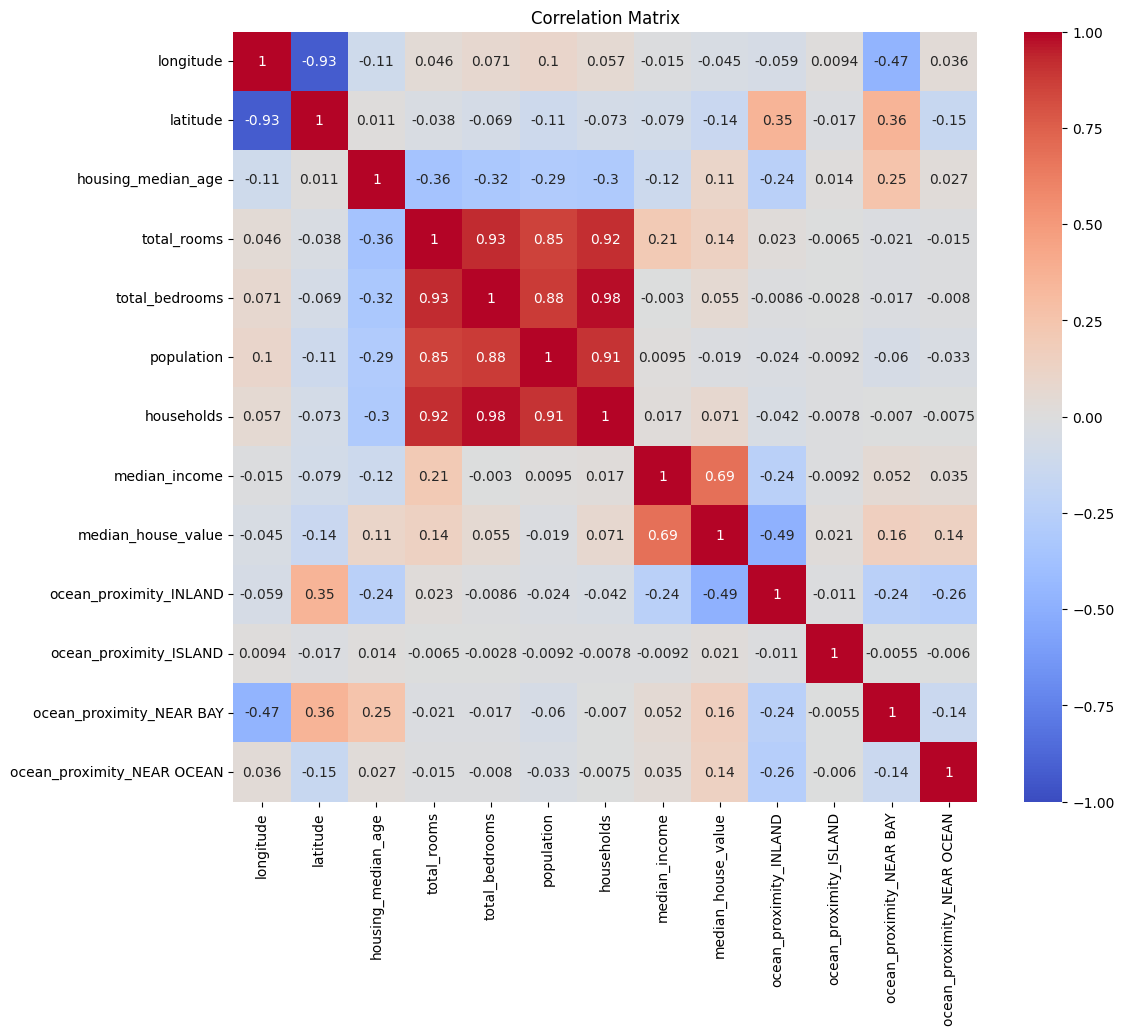

In [13]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


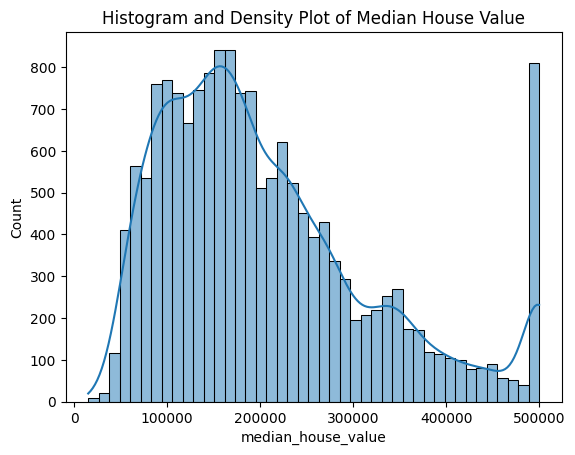

In [14]:
sns.histplot(df['median_house_value'], kde=True)
plt.title('Histogram and Density Plot of Median House Value')
plt.show()


##HyperParameter Tuning

In [15]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_regressor = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           cv=10, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train_imputed, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")

y_pred_best = best_model.predict(X_test_imputed)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error of the Best Model: {mse_best}")


Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Model: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)
Mean Squared Error of the Best Model: 3631710050.5421433


##Fitting the Model

In [16]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42)

dt_regressor.fit(X_train_imputed, y_train)

y_pred = dt_regressor.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3631710050.5421433
R-squared: 0.7279520271136308
